# This is a demo of how to use python notebook

to document your journey of researching "Evolutionary Dynamics: Exploring the Equations of Life"

For reference on LaTeX: https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/

For example, $f'(a) = \lim_{x \to \infty}\frac{f(x)-g(x)}{x-a}$

$$A = \begin{bmatrix} 0 & 1 & -1 \\ -1 & 0 & 1 \\ 1 & -1 & 0 \end{bmatrix}$$


# Chapter 2: What Evolution Is

## 2.2 Selection
### 2.2.2 Survival of the First, Survival of All

On page 19, 20

$\dot{x} = x(1-x)f(x)$,
where
$f(x) = ax^{c-1} - b(1-x)^{c-1}$

For $c\ne 1$, there exists exactly one other fixed point between 0 and 1, given by 
$$x^*=\frac{1}{1+ \sqrt[c-1]{a/b}}$$

Show that:

If $c<1$, the interior fixed point, $x^*$, is globally stable.

If $c>1$, the interior fixed point, $x^*$, is unstable.

# Chapter 4: Evolutionary Games

## 4.5 Replicator Dynamics
### 4.5.1 Two Strategies
On page 57,

In the interior, there can be at most one isolated fixed point. Such a fixed point exists 
if $(a_{11}-a_{21}(a_{12}-a_{22})<0$ .

Show the above statement (that is, such a fixed point exists if $(a-c)(b-d)<0$) is true in terms of the following equation (given in eq 4.5 on page 50)
$$ \dot{x} = x(1-x)[(a-b-c+d)x+b-d] $$



### 4.5.2 Three Strategies

Reproduce three trajectories in the paper-rock-scissors simplex (Figure 4.6, page 59).

In [1]:
import numpy as np


module loaded


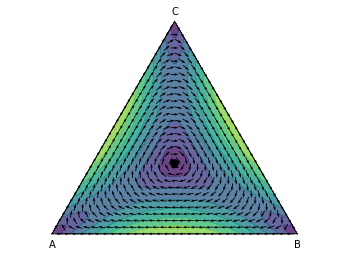

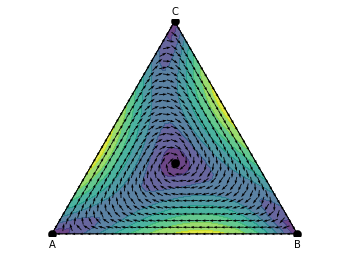

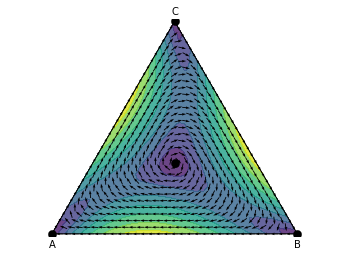

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from vendor import egtsimplex

#define function of x=[x0,x1,x2] and t to plot dynamics on simplex
def f_version_1(x, t):
    global A
    phi = (x.dot(A.dot(x)))
    x0dot = x[0]*(A.dot(x)[0]-phi)
    x1dot = x[1]*(A.dot(x)[1]-phi)
    x2dot = x[2]*(A.dot(x)[2]-phi)
    return [x0dot,x1dot,x2dot]

def f(x, t):
    global A
    phi = (x.dot(A.dot(x)))
    return x*(A.dot(x)-phi)


As = [np.array([[0,1,-1], [-1,0,1], [1,-1,0]]),
      np.array([[0,3,-1], [-1,0,3], [3,-1,0]]),
      np.array([[0,1,-3], [-3,0,1], [1,-3,0]]) ]

for i in range(3):
    A = As[i] # A is a global variable
    dynamics = egtsimplex.simplex_dynamics(f)
    
    fig, ax = plt.subplots()
    dynamics.plot_simplex(ax)

### 4.5.2 Three Strategies

on Page 59

The general rock-paper-scissors game is given by the payoff matrix
$$ A = \begin{bmatrix} 0 & -a_2 & b_3 \\ b_1 & 0 & -a_3 \\ -a_1 & b_2 & 0 \end{bmatrix} $$

Show:

(i) if the determinant of A is positive (that is, $a_1a_2a_3<b_1b_2b_3$,
then there exists a unique interior equilibrium that is globally stable.

(ii) if the determinant of A is negative (that is, $a_1a_2a_3>b_1b_2b_3$,
then there exists a unique interior equilibrium that is unstable.


## 4.9 Game Theory and Ecology
### 4.9.1 Predator and Prey

$$ \dot{x} = x(a-by) \\
\dot{y} = y(-c+dx)
$$

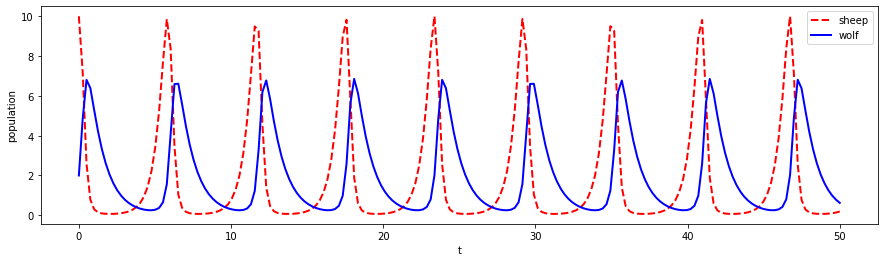

In [3]:
# plot the dynamics of the above equation

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.integrate import odeint  # Ordinary Differential Equation

def f(xy, t):
    a, b, c, d = 2, 1, 1, .5
    x = xy[0]
    y = xy[1]
    dx = x*(a-b*y)
    dy = y*(-c+d*x)
    return [dx, dy]

t = np.linspace(0, 50, 200)
s0 = [10, 2]

s = odeint(f, s0, t)

plt.figure(figsize=(15, 4))

plt.plot(t,s[:,0],'r--', linewidth=2.0)
plt.plot(t,s[:,1],'b-', linewidth=2.0)
plt.xlabel("t")
plt.ylabel("population")
plt.legend(["sheep", "wolf"])

# Chapter 5: Prisoners of the Dilemma

## 5.3 Reactive Strategies
### 5.3.1 "In Silico" Evolution

On page 84

Let us perform an experiment to understand the evolutionary dynamics of reactive strategies. Use a random number generator that returns a uniform distribution on [0,1] to produce n=100 reactive strategies. Let us use the same payoff values that Axelrod chose for his two tournaments: R=3, T=5, S=0, and P=1. Calcuate the $n\times n$ payoff matrix using equation (5.17, given below). Insert the matrix into the replicator equation.

$$ E(S_1,S_2) = Rs_1s_2 + Ss_1(1-s_2) + T(1-s_1)s_2 + P(1-s_1)(1-s_2) $$

The replicator equation is in Figure 4.5 (page 56):

$$ \dot{x_i} = x_i[f_j(\vec{x}) - \phi(\vec{x})] $$
, where 
$$ \phi(\vec{x}) = \sum_i f_i(\vec{x})x_i $$

$$ f_i(\vec{x}) = \sum_{j=1}^n a_{ij}x_j$$

$$ \vec{x} = (x_1, x_2, ..., x_n)$$

Show the evolution of the above procedure with computer simulation
- Reference: Nowak, M. A. & K. Sigmund (1992). Tit for tat in heterogeneous populations. Nature 355: 250-253. DOI: 10.1038/355250a0  [PDF](https://ped.fas.harvard.edu/files/ped/files/nature92b_0.pdf)

In [4]:
np.set_printoptions(precision=3, suppress=True)

In [5]:
# create payoff matrix

R, S, T, P = 3, 0, 5, 1 # Reward, Suck, Temptation, Punishment

M = 2
N = M*M # total strategies in total

proba_list = np.linspace(0.00001, .99999, M)
print(proba_list)

debug = 0
# debug = 1

def payoff(p1, q1, p2, q2): # payoff of two strategies (p1, q1) vs (p2, q2)
    r1 = p1-q1
    if abs(r1)==1:
        p1 -= r1*0.0001
        r1 = p1-q1
    r2 = p2-q2
    if abs(r2)==1:
        p2 -= r2*0.0001
        r2 = p2-q2

    s1 = (q2*r1 + q1) / (1-r1*r2)
    s2 = (q1*r2 + q2) / (1-r1*r2)
    v1 = s1*s2
    v2 = s1*(1-s2)
    v3 = (1-s1)*s2
    v4 = (1-s1)*(1-s2)
    result = R*v1 + S*v2 + T*v3 + P*v4
    if debug == 2:
        print(p1, q1, p2, q2, r1, r2, s1, s2, v1, v2, v3, v4, result)
    return result


def compute_payoff_between_i_and_j(i, j): # both i and j are in the range of (0, 1, ...,99)
    i_row = int(i/M)
    i_col = i%M
    p1 = proba_list[i_row]
    q1 = proba_list[i_col]
    j_row = int(j/M)
    j_col = j%M
    p2 = proba_list[j_row]
    q2 = proba_list[j_col]
    
    expected_payoff = payoff(p1, q1, p2, q2)
    
    if debug:
        print(f'[i={i:02d}] ({i_row}, {i_col}) ({p1:.3f}, {q1:.3f}) vs. [j={j:02d}] ({j_row}, {j_col}) ({p2:.3f}, {q2:.3f})  payoff: {expected_payoff:.2f}' )
    return expected_payoff
    
    
payoff_matrix = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        payoff_matrix[i, j] = compute_payoff_between_i_and_j(i, j)    

[0. 1.]


In [6]:
# inspection = 0 # ALLD
# inspection = N-1 # ALLC
# inspection = N-M # TFT. Payoff is different from what I expected - initial action is not considered?

if M==3:
    np.set_printoptions(precision=2, suppress=True)
    display(pd.DataFrame(payoff_matrix))

max freq: 0.94    min freq: -0.00
x_hist.shape = (99, 4)


,0,1,2,3
0,0.25,0.25,0.25,0.25
1,0.69,0.08,0.21,0.02
2,0.62,0.02,0.36,0.01
3,0.19,0.01,0.79,0.01
4,0.01,0.01,0.89,0.09
5,0.00,0.03,0.64,0.33
6,0.00,0.21,0.42,0.37
7,0.06,0.54,0.36,0.04
8,0.47,0.22,0.30,0.00
9,0.50,0.06,0.43,0.00


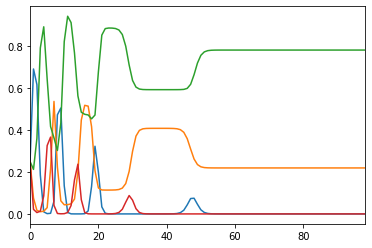

In [7]:
def f(x, t):
    payoff_vector = payoff_matrix.dot(x)
    phi = x.dot(payoff_vector)
#     print(f'{phi:.1f}', end=' ')
    dx = x*(payoff_vector - phi)
    return dx

stop, cnt = 3*N, N-1
if N<=30:
    stop, cnt = 300, 99
t = np.linspace(0, stop, cnt)
x_init = np.ones(N)/N

x_hist = odeint(f, x_init, t)

print(f'max freq: {x_hist.max():.2f}    min freq: {x_hist.min():.2f}')
print('x_hist.shape =', x_hist.shape)


df = pd.DataFrame(x_hist[:, :])
df.plot(legend=False)

pd.DataFrame(x_hist).round(2)[:10]

P [0. 0. 1. 1.]
Q [0. 1. 0. 1.]


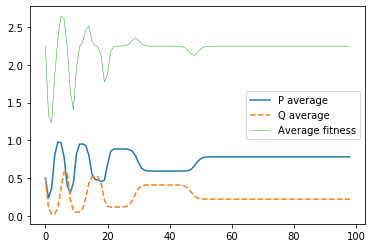

In [8]:
proba_list_P = np.repeat(proba_list, M)
proba_list_Q = np.tile(proba_list, M)
print('P', proba_list_P[:20])
print('Q', proba_list_Q[:20])

P = [proba_list_P.dot(x_hist[i,:]) for i in range(len(x_hist))]
Q = [proba_list_Q.dot(x_hist[i,:]) for i in range(len(x_hist))]
plt.plot(P, '-')
plt.plot(Q, '--')

fitness = [x_hist[i,:].dot(payoff_matrix.dot(x_hist[i,:])) for i in range(len(x_hist))]
plt.plot(fitness, linewidth=0.5)

plt.legend(['P average', 'Q average', 'Average fitness'])

x: [0. 0. 1. 1.]
y: [0. 1. 0. 1.]


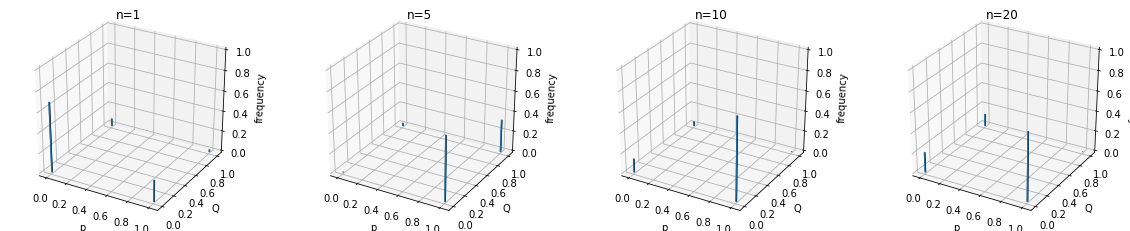

In [9]:
from mpl_toolkits.mplot3d import Axes3D 

x = y = np.linspace(0, 1, M)
x_, y_ = np.meshgrid(x, y)
x, y = x_.ravel(), y_.ravel()

x, y = y, x # this is because meshgrid and my treatment of index are orthogonal
print('x:', x[:10])
print('y:', y[:10])

fig = plt.figure(figsize=(20, 4))

n_list = (1, 5, 10, 20)
if M==10:
    n_list = (1, 20, 55, 56, 75)
if M==15:
    n_list = (10, 200, 330, 342, 490)
if M==3:
    n_list = (1, 5, 10, 20)

for i in range(len(n_list)):
    n = n_list[i]
    z = x_hist[n, :]
    
    ax = fig.add_subplot(1, len(n_list), i+1, projection='3d')
    bottom = np.zeros_like(x)
    width = depth = .01
    ax.bar3d(x, y, bottom, width, depth, z)
    ax.set_xlabel('p')
    ax.set_ylabel('Q')
    ax.set_zlabel('frequency')
    plt.title(f'n={n}')
    ax.set_zlim(0, 1)

In [10]:
if 0: # plot 3D surface
    from mpl_toolkits import mplot3d

    x = y = np.linspace(0, 1, M)
    X, Y = np.meshgrid(x, y)

    fig = plt.figure(figsize=(20, 4))

    ns = (40, 65, 70, 75, 90)
    for i in range(len(ns)):
        n = ns[i]
        Z = x_hist[n,:].reshape((M,M))

        ax = fig.add_subplot(1, len(ns), i+1, projection='3d')             
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
        ax.set_xlabel('P')
        ax.set_ylabel('Q')
        ax.set_zlim(0, 1)

**Approach Two: Use the simple approach as described in the following win-stay lose-shift part

## 5.5 Win-Stay Lose-Shift

- Reference: 
Nowak, M. A. & K. Sigmund (1993). A strategy of win-stay, lose-shift that outperforms tit-for-tat in the Prisoner’s Dilemma game. Nature 364: 56-58. DOI: 10.1038/364056a0 [PDF](https://ped.fas.harvard.edu/files/ped/files/nature93_0.pdf)

- Simulation approach (as described on page 87)
    - start with a homogeneous population with strategy (1/2, 1/2, 1/2, 1/2)
    - every 100 generations, inject a small number of new population with a mutatant strategy, according to U-shaped distribution (which biases to the corner or bounday since most relevant strategies are around there)

- **The one we will take**
    - Use the same one as the Generous TFT (because of the computing power nowadays)
    - M=5. Strategy space for (p1,p2,p3,p4) will be M^4 = 625. Payoff matrix will be: M^8=390,625
    - M=3. Strategy space will be M^4 = 81. Payoff matrix will be: 6,561 (which is surely doable)
    
    - ask Kelly modify the above code
    - key part is payoff matrix
    - about how to calculate the left eigenvector of Markov matrix, see:
        * https://stackoverflow.com/questions/21866930/left-hand-side-eigenvector-in-python
        * from scipy.linalg import eig
        * values, vecs_left, vecs_right = eig(M, left=True)
        * vecs_left.T[0] is the first eigenvector that corresponds to the eigenvalue of 1 (for Markov matrices)
        * We need to do such eig() computation for M^8 times (which is 10^8 when M=10 or 390,000 when M=5)

In [64]:
%%time
# create payoff matrix for win-stay lose-shift experiment

R, S, T, P = 3, 0, 5, 1 # Reward, Suck, Temptation, Punishment

M = 4
N = M**4 # total strategies in total

proba_list = np.linspace(0.01, .99, M)
print(proba_list)

debug = 0
# debug = 1

from scipy.linalg import eig

def payoff(p1, p2, p3, p4, p1_, p2_, p3_, p4_): # payoff of strategy (p1,p2,p3,p4) against (p1_,p2_,p3_,p4_)
    markov = np.array([
    [ p1*p1_, p1*(1-p1_), (1-p1)*p1_, (1-p1)*(1-p1_) ],
    [ p2*p3_, p2*(1-p3_), (1-p2)*p3_, (1-p2)*(1-p3_) ],
    [ p3*p2_, p3*(1-p2_), (1-p3)*p2_, (1-p3)*(1-p2_) ],
    [ p4*p4_, p4*(1-p4_), (1-p4)*p4_, (1-p4)*(1-p4_) ] ])
    
#     print(markov)
    
    # copied from https://stackoverflow.com/questions/31791728/python-code-explanation-for-stationary-distribution-of-a-markov-chain
    evals, evecs = np.linalg.eig(markov.T)
    evec1 = evecs[:,np.isclose(evals, 1)]

    #Since np.isclose will return an array, we've indexed with an array
    #so we still have our 2nd axis.  Get rid of it, since it's only size 1.
    evec1 = evec1[:,0]
    stationary = evec1 / evec1.sum()

    #eigs finds complex eigenvalues and eigenvectors, so you'll want the real part.
    stationary = stationary.real
#     print(stationary)
#     print(stationary.dot(markov))
#     return
    
    v1, v2, v3, v4 = stationary
    result = R*v1 + S*v2 + T*v3 + P*v4
    return result

def convert_number(n, base):
    remainders = [0]*4 # 4 dimension
    i = 0
    while n>0: 
        n, r = divmod(n, base)
        remainders[i] = r
        i += 1
    return remainders[::-1]

def add_noise(*arr): return [e+np.random.uniform(0,0.01) for e in arr]

def compute_payoff_between_i_and_j(i, j): # both i and j are in the range of (0, 1, ..., N=M**4-1)    
    i1, i2, i3, i4 = convert_number(i, M)
    j1, j2, j3, j4 = convert_number(j, M)
    
    p1, p2, p3, p4 = proba_list[i1], proba_list[i2], proba_list[i3], proba_list[i4]
    p1_, p2_, p3_, p4_ = proba_list[j1], proba_list[j2], proba_list[j3], proba_list[j4]
    
    if 1:
        np.random.seed(123)
        p1, p2, p3, p4 = add_noise(p1, p2, p3, p4)
        p1_, p2_, p3_, p4_ = add_noise(p1_, p2_, p3_, p4_)
    
    expected_payoff = payoff(p1, p2, p3, p4, p1_, p2_, p3_, p4_)
    
    if debug:
        print(f'[i={i:02d}] ({i_row}, {i_col}) ({p1:.3f}, {q1:.3f}) vs. [j={j:02d}] ({j_row}, {j_col}) ({p2:.3f}, {q2:.3f})  payoff: {expected_payoff:.2f}' )
    return expected_payoff
    
    
payoff_matrix = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        payoff_matrix[i, j] = compute_payoff_between_i_and_j(i, j)
#         break
#     break


[0.01  0.337 0.663 0.99 ]
CPU times: user 8.12 s, sys: 22.4 ms, total: 8.14 s
Wall time: 8.14 s


In [65]:
df_payoff = pd.DataFrame(payoff_matrix)
if M==2:
    display(df_payoff.round(2))
else:
    display(pd.DataFrame(payoff_matrix[:10,:20]).round(2))
    save_payoff_matrix = 0
    if save_payoff_matrix:
        df_payoff.to_csv(f'payoff_matrix_WSLS_{M}.csv', index=False, float_format="%.3f")


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.05,2.00,2.59,2.98,1.07,2.02,2.59,2.98,1.09,2.03,2.60,2.99,1.11,2.04,2.60,2.99,1.08,2.33,2.98,3.37
1,0.81,1.60,2.19,2.65,1.13,1.75,2.25,2.66,1.40,1.90,2.31,2.66,1.64,2.03,2.37,2.67,0.84,1.83,2.50,2.98
2,0.67,1.29,1.84,2.33,1.16,1.57,1.96,2.34,1.56,1.81,2.07,2.35,1.88,2.02,2.18,2.35,0.69,1.41,2.02,2.54
3,0.57,1.05,1.53,2.01,1.18,1.43,1.71,2.02,1.65,1.75,1.88,2.03,2.01,2.02,2.03,2.04,0.59,1.07,1.55,2.02
4,1.05,1.85,2.29,2.57,1.07,1.93,2.38,2.65,1.11,2.02,2.47,2.73,1.15,2.13,2.57,2.83,1.07,2.10,2.59,2.88
5,0.81,1.52,2.03,2.40,1.14,1.71,2.14,2.46,1.46,1.91,2.26,2.54,1.78,2.12,2.39,2.63,0.83,1.69,2.25,2.65
6,0.66,1.26,1.77,2.21,1.17,1.55,1.91,2.25,1.61,1.83,2.07,2.31,2.01,2.11,2.23,2.37,0.68,1.35,1.90,2.36
7,0.57,1.05,1.52,2.00,1.19,1.43,1.70,2.01,1.70,1.78,1.89,2.03,2.13,2.11,2.08,2.05,0.58,1.06,1.54,2.01
8,1.04,1.73,2.06,2.26,1.08,1.85,2.18,2.37,1.13,2.02,2.34,2.51,1.25,2.26,2.54,2.67,1.06,1.93,2.33,2.56
9,0.81,1.46,1.89,2.19,1.14,1.67,2.02,2.28,1.54,1.93,2.20,2.40,2.01,2.25,2.43,2.57,0.82,1.60,2.08,2.42


max freq: 0.49    min freq: -0.00
x_hist.shape = (255, 256)


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.04,0.02,0.01,0.00,0.01,0.01,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.05,0.02,0.01,0.00,0.01,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.05,0.01,0.00,0.00,0.01,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


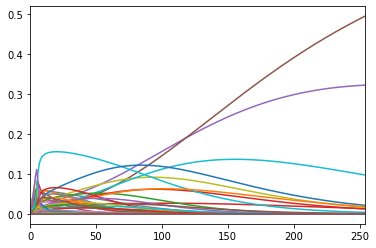

In [66]:
def f(x, t):
    payoff_vector = payoff_matrix.dot(x)
    phi = x.dot(payoff_vector)
#     print(f'{phi:.1f}', end=' ')
    dx = x*(payoff_vector - phi)
    return dx

stop, cnt = 20*N, 5*N-1
stop, cnt = 3*N, N-1
if N<=30:
    stop, cnt = 500, 99
t = np.linspace(0, stop, cnt)
x_init = np.ones(N)/N

x_hist = odeint(f, x_init, t)

print(f'max freq: {x_hist.max():.2f}    min freq: {x_hist.min():.2f}')
print('x_hist.shape =', x_hist.shape)


df = pd.DataFrame(x_hist[:, :])
df.plot(legend=False)

pd.DataFrame(x_hist).round(2)[:10]

In [67]:
m = M
r, s, t, p = np.zeros((4, m**4))
for i in range(m**4): 
    a, b, c, d = convert_number(i, m) 
    r[i] = proba_list[a]
    s[i] = proba_list[b]
    t[i] = proba_list[c]
    p[i] = proba_list[d]
print(m, r.shape)
print(r[:10])
print(s[:20])
print(t[:10])
print(p[:10])

4 (256,)
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
 0.01  0.01  0.01  0.01  0.337 0.337 0.337 0.337]
[0.01  0.01  0.01  0.01  0.337 0.337 0.337 0.337 0.663 0.663]
[0.01  0.337 0.663 0.99  0.01  0.337 0.663 0.99  0.01  0.337]


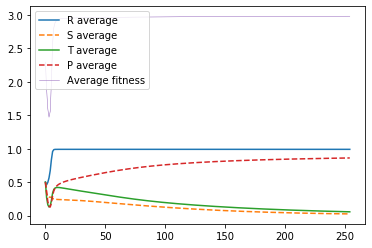

In [68]:
R = [r.dot(x_hist[i,:]) for i in range(len(x_hist))]
S = [s.dot(x_hist[i,:]) for i in range(len(x_hist))]
T = [t.dot(x_hist[i,:]) for i in range(len(x_hist))]
P = [p.dot(x_hist[i,:]) for i in range(len(x_hist))]
plt.plot(R, '-')
plt.plot(S, '--')
plt.plot(T, '-')
plt.plot(P, '--')

fitness = [x_hist[i,:].dot(payoff_matrix.dot(x_hist[i,:])) for i in range(len(x_hist))]
plt.plot(fitness, linewidth=0.5)

plt.legend(['R average', 'S average', 'T average', 'P average', 'Average fitness'])